In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
%pylab inline


from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
%pylab inline
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv("DatingData_Train.csv")

df_test = pd.read_csv("DatingData_Test.csv")


selected_df = df_train[['Age_M','Age_F','Race_M','Race_F','Attractive_M_M','Attractive_F_F','Sincere_M_M','Sincere_F_F','Intelligence_M_M','Intelligence_F_F','Funny_M_M','Funny_F_F','Ambition_M_M','Ambition_F_F','AttractiveImportance_M_M','AttractiveImportance_F_F','SincereImportance_M_M','SincereImportance_F_F','IntelligenceImportance_M_M','IntelligenceImportance_F_F','AmbitiousImportance_M_M','AmbitiousImportance_F_F','SharedInterestImportance_M_M','SharedInterestImportance_F_F','ValuesDelta','Similar_Values_Bucket','SimilarityBucket','IntresetinCorrelation','IsMatch']]


selected_df_test = df_test[['Age_M','Age_F','Race_M','Race_F','Attractive_M_M','Attractive_F_F','Sincere_M_M','Sincere_F_F','Intelligence_M_M','Intelligence_F_F','Funny_M_M','Funny_F_F','Ambition_M_M','Ambition_F_F','AttractiveImportance_M_M','AttractiveImportance_F_F','SincereImportance_M_M','SincereImportance_F_F','IntelligenceImportance_M_M','IntelligenceImportance_F_F','AmbitiousImportance_M_M','AmbitiousImportance_F_F','SharedInterestImportance_M_M','SharedInterestImportance_F_F','ValuesDelta','Similar_Values_Bucket','SimilarityBucket','IntresetinCorrelation','IsMatch']]

In [5]:
formula = 'IsMatch ~ 0 + Age_M + Age_F + Race_M + Race_F +  Attractive_M_M  + Attractive_F_F + Sincere_M_M + Sincere_F_F + Intelligence_M_M +  Intelligence_F_F + Funny_M_M + Funny_F_F + Ambition_M_M + Ambition_F_F + AttractiveImportance_M_M + AttractiveImportance_F_F + SincereImportance_M_M + SincereImportance_F_F + IntelligenceImportance_M_M + IntelligenceImportance_F_F + AmbitiousImportance_M_M + AmbitiousImportance_F_F + SharedInterestImportance_M_M + SharedInterestImportance_F_F + ValuesDelta + Similar_Values_Bucket + SimilarityBucket + IntresetinCorrelation'


In [7]:
Y_Train, X_train = dmatrices(formula, selected_df, return_type='dataframe')
y_train = Y_Train['IsMatch'].values


Y_Test, X_test = dmatrices(formula, selected_df_test, return_type='dataframe')
y_test = Y_Test['IsMatch'].values

In [11]:
Y_Train['IsMatch'].value_counts()

IsMatch
0.0    4485
1.0     930
Name: count, dtype: int64

In [13]:
print(len(y_train))

5415


In [89]:
# # Iterate over max_depth
# for max_depth in [2,4,7,10,12,15,18,25,50,100,400,500]:
#     model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
#     result = model3.fit(X_train, y_train)
#     from sklearn import metrics
#     # train accuracy
#     prediction_train = model3.predict(X_train)
#     print(max_depth)
#     print(metrics.accuracy_score(y_train, prediction_train))
#     prediction_test = model3.predict(X_test)
#     print(metrics.accuracy_score(y_test, prediction_test))
    

2
0.8282548476454293
0.8285291943828529
4
0.8308402585410896
0.8181818181818182
7
0.843213296398892
0.8137472283813747
10
0.8766389658356417
0.7997043606799704
12
0.900646352723915
0.762010347376201
15
0.9438596491228071
0.7568366592756837
18
0.974145891043398
0.7627494456762749
25
0.9998153277931672
0.7494456762749445
50
1.0
0.7553584626755359
100
1.0
0.7420546932742055
400
1.0
0.7442719881744272
500
1.0
0.7487065779748706


In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 4)

In [11]:
result = model.fit(X_train, y_train)

In [13]:
from sklearn import metrics
# train accuracy
prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.8308402585410896


In [15]:
# test accuracy
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.819660014781966


In [17]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                                          Feature  Importance
36                                      Funny_F_F    0.335163
35                                      Funny_M_M    0.276946
30                                 Attractive_F_F    0.102913
29                                 Attractive_M_M    0.102228
43                     IntelligenceImportance_M_M    0.045637
34                               Intelligence_F_F    0.036205
27                                          Age_M    0.021130
32                                    Sincere_F_F    0.020500
33                               Intelligence_M_M    0.017792
44                     IntelligenceImportance_F_F    0.017573
42                          SincereImportance_F_F    0.012126
28                                          Age_F    0.011786
37                                   Ambition_M_M    0.000000
31                                    Sincere_M_M    0.000000
0   Race_M[Asian/Pacific Islander/Asian-American]    0.000000
38      

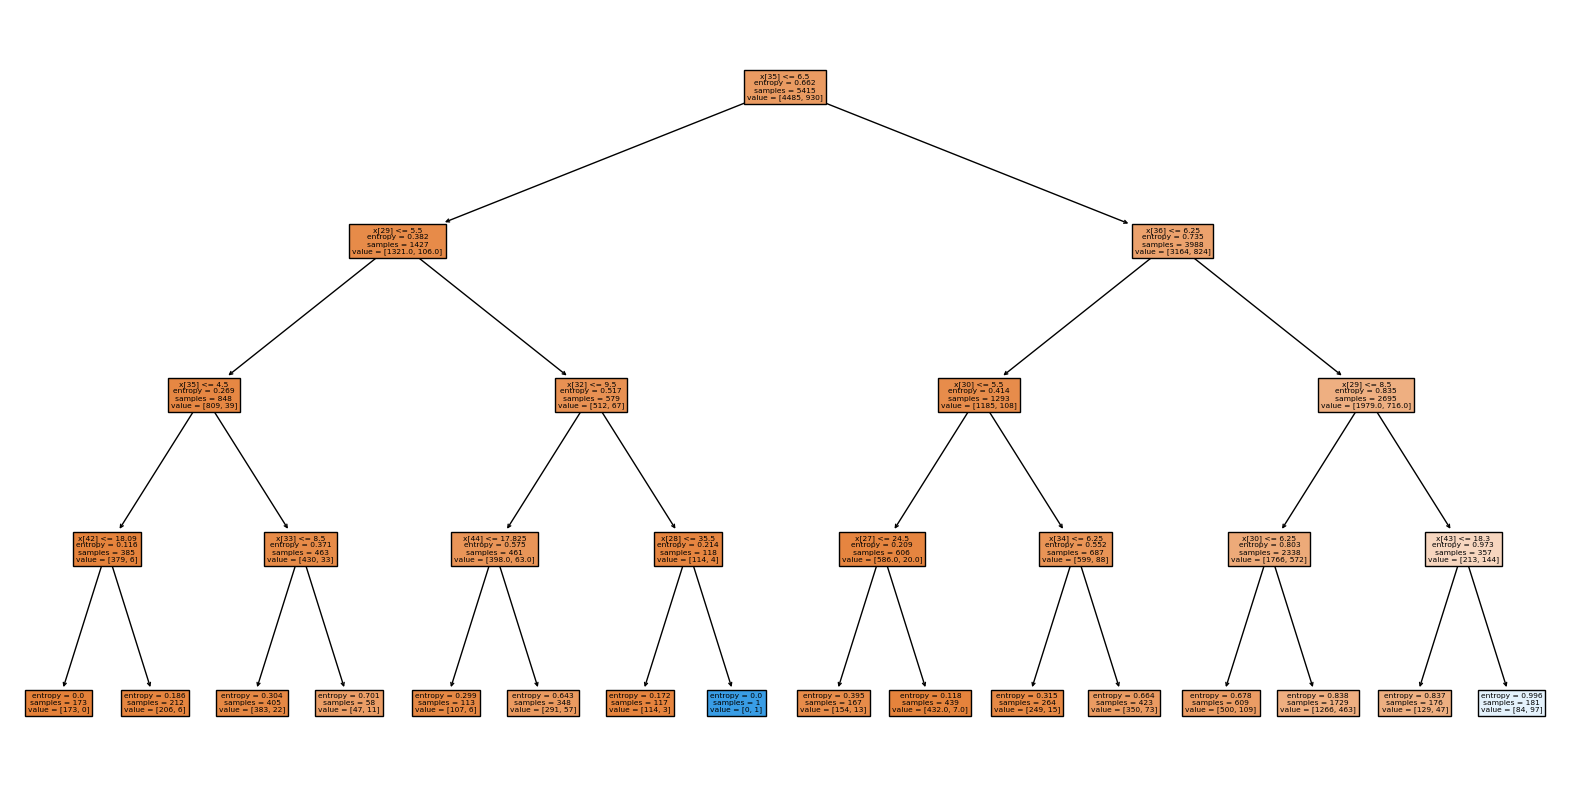

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

#clf = tree.DecisionTreeClassifier().fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(result, filled=True)
plt.show()


# tree.plot_tree(result, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.show()


In [45]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, Y_Train)

from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(Y_Train, prediction_train))


0.8541089566020313


In [47]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(Y_Test, prediction))

0.811529933481153


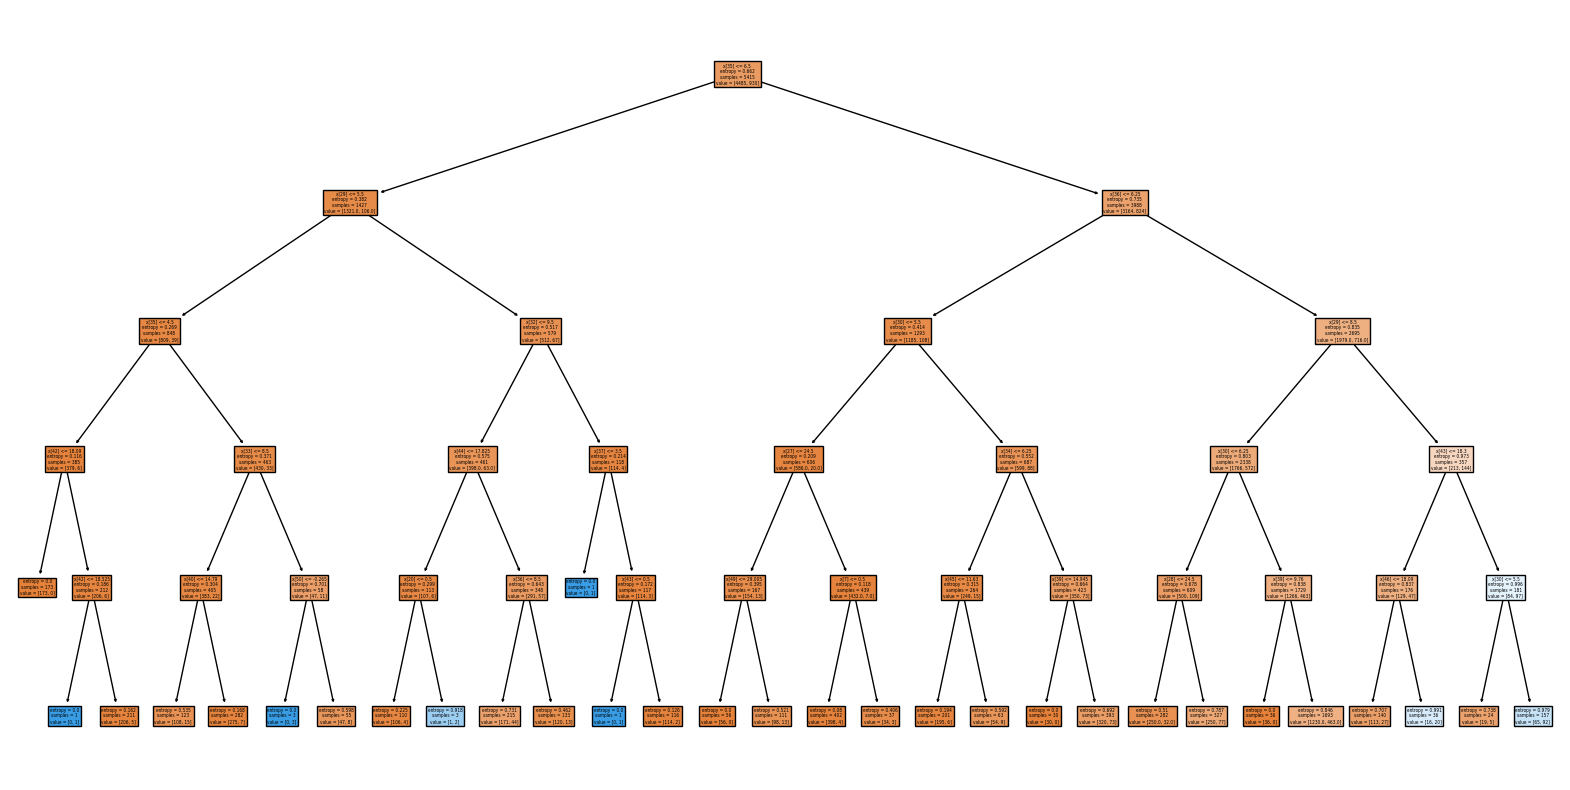

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

#clf = tree.DecisionTreeClassifier().fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(result, filled=True)
plt.show()

In [91]:
# Cross Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create the folds in the training data
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in [2,4,7,10,12,15,18,25]:
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))

max_depth=2 scores=[0.82825485 0.82825485 0.82825485] avg_score=0.8282548476454293
max_depth=4 scores=[0.82825485 0.8232687  0.82216066] avg_score=0.8245614035087719
max_depth=7 scores=[0.81828255 0.81385042 0.82160665] avg_score=0.8179132040627884
max_depth=10 scores=[0.78504155 0.7966759  0.7867036 ] avg_score=0.7894736842105262
max_depth=12 scores=[0.7767313  0.7800554  0.79612188] avg_score=0.784302862419206
max_depth=15 scores=[0.77119114 0.77839335 0.76897507] avg_score=0.7728531855955678
max_depth=18 scores=[0.7700831  0.77506925 0.76454294] avg_score=0.769898430286242
max_depth=25 scores=[0.76066482 0.76066482 0.76897507] avg_score=0.7634349030470915
